In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from math import sqrt
from matplotlib import style
style.use("ggplot")

In [2]:
k = 4.041816237
Ek = 0.012 # ~
Dk = k * Ek
print(Dk)

0.048501794844


In [3]:
def EDiff(a, b):
    hi = max(a, b)
    lo = min(a, b)
    return (hi - lo) / hi

EDiff(79.8811, 79.0625)

0.010247730689737666

In [4]:
allTimes = [
    [21.852, 21.813, 21.802, 21.805, 21.813, 21.818],
    [20.658, 20.659, 20.635, 20.596, 20.599],
    [19.415, 19.332, 19.376, 19.360, 19.408, 19.262, 19.323, 19.267, 19.139],
    [18.323, 18.330, 18.317, 18.271, 18.314, 18.244],
    [17.430, 17.411, 17.380, 17.357, 17.310, 17.255],
    [16.703, 16.657, 16.682, 16.687, 16.706],
    [16.139, 16.153, 16.078, 16.053, 16.059],
    [15.834, 15.767, 15.806, 15.716, 15.766],
    [15.671, 15.636, 15.605, 15.631, 15.549, 15.603]
]


In [5]:
D = 90
h = list(reversed([h / 10. for h in range(0, 125 - D // 2 + 1, 10)]))
t = [allTimes[i][-1] for i in range(len(allTimes))]

t = np.array(t)
h = np.array(h)

print(h)
print(t)

[ 8.  7.  6.  5.  4.  3.  2.  1.  0.]
[ 21.818  20.599  19.139  18.244  17.255  16.706  16.059  15.766  15.603]


In [6]:
t = t / 5.
print(t)

[ 4.3636  4.1198  3.8278  3.6488  3.451   3.3412  3.2118  3.1532  3.1206]


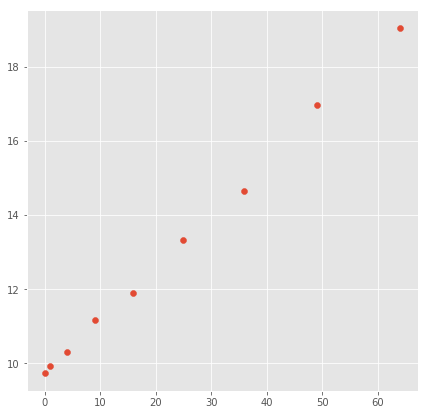

In [7]:
plt.figure(figsize=(7, 7))
plt.scatter(h*h, t*t)
plt.show()

# Случайная ошибка времени

In [8]:
def rmse_corrected(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).sum() / (predictions.size - 1))

F = pd.DataFrame(allTimes[2])
absErr = rmse_corrected(F, F.mean())[0]

timerErr = 0.001 # can be ignored 
absErr = sqrt(timerErr**2 + absErr**2)

relErr = absErr / F.mean()[0];
print("Absolute T error = ", absErr)
print("Relative T error = ", relErr)


Ek = 0.012 # calculated 
Em = 0.3 / 1012.5
Et = relErr /5
print("Realtive t = T / 5 error = ", Et)
Ei = math.sqrt(Ek**2 + Em**2 + (2*Et)**2)
print("Impulse relative error = ", Ei) # for the first exp
print(F.mean())

Absolute T error =  0.08703415676873359
Relative T error =  0.00450482172346
Realtive t = T / 5 error =  0.000900964344692
Impulse relative error =  0.01213815218626062
0    19.320222
dtype: float64


# Платформа

In [9]:
def sciPrint(val, relErr):
    print(val, "+-", val * relErr, "(", relErr * 100., "%)")

m = 1012.5 * 1e-3
Dm = 0.3 * 1e-3

Ri = 12.5
DRi = 0.1

EiTheory1 = sqrt((Dm/m)**2 + (2*DRi/Ri)**2)
print(EiTheory1)

0.016002743249055734


In [10]:
ITheory1 = 1./2.*m*(Ri**2)
print(ITheory1, "+-", ITheory1 * EiTheory1)

79.1015625 +- 1.2658419952866353


In [11]:
T = 22.096 / 5.
IExp1  = m * k * (T**2)
EIExp1 = sqrt(Ek**2 + (Dm/m)**2 + (2*Et)**2)
# print(Ei1)
print(IExp1, "+-", IExp1 * EIExp1)


79.92063206479688 +- 0.9700887948246448


# Полый цилиндр + платформа

In [12]:
T = 21.320 / 5.

mc = 0.9762
Dmc = 0.0001

m2 = m + mc

EIExp2 = sqrt((Dm**2 + Dmc**2) / (m2**2) + Ek**2 + (2*Et)**2)
IExp2 = m2*k*T**2
sciPrint(IExp2, EIExp2)

146.14374428056425 +- 1.7735386785908136 ( 1.2135577114994431 %)


In [13]:
rc = 15.74 / 2
Drc = 0.01
Erc = Drc / rc

Rc = rc + 0.53
DRc = 0.01
ERc = DRc / Rc

DRc2 = (ERc * 2) * (Rc**2)
Drc2 = (Erc * 2) * (rc**2)

Erc2plusRc2 = sqrt(DRc2**2 + Drc2**2) / (Rc**2 + rc**2)

print("Erc2plusRc2 = ", Erc2plusRc2)

ITheoryC = 1./2. * mc * (Rc**2 + rc**2)
ITheory2 = ITheory1 + ITheoryC
print(ITheoryC)
EiTheoryC = sqrt((Dmc / mc)**2  + Erc2plusRc2**2)
EiTheory2 = sqrt((EiTheory1 * ITheory1)**2  + (EiTheoryC * ITheoryC)**2) / ITheory2
   
sciPrint(ITheory2, EiTheory2)

Erc2plusRc2 =  0.0017375092967516167
64.67173689
143.77329939 +- 1.2708368721094487 ( 0.8839171650795686 %)


In [14]:
print(abs(ITheory2 - IExp2))

2.3704448905642437


# Полый цилиндр

In [15]:
IExp3 = IExp2 - IExp1
print(EIExp2,IExp2,EIExp1*IExp1)
DIExp3 = sqrt((EIExp2 * IExp2)**2 + (EIExp1 * IExp1)**2)
EIExp3 = DIExp3 / IExp3
sciPrint(IExp3, EIExp3)

0.01213557711499443 146.14374428056425 0.9700887948246448
66.22311221576737 +- 2.0215122345170164 ( 3.052578120959566 %)


In [16]:
sciPrint(ITheoryC, EiTheoryC)

64.67173689 +- 0.11256286457654506 ( 0.17405263874078866 %)


# Брусок с платформой

In [17]:
mb = 1.2046
Dmb = 0.0001

m4 = mb + m

T = 18.620 / 5.

EIExp4 = sqrt((Dm**2 + Dmb**2) / (m4**2) + Ek**2 + (2*Et)**2)
IExp4 = m4 * k * T**2
sciPrint(IExp4, EIExp4)


124.27426143939996 +- 1.508114582554119 ( 1.213537352856869 %)


In [18]:
a = 2.7
Da = 0.04

L = 21.
DL = 0.1

Ea = Da / a
EL = DL / L

Da2 = (Ea * 2) * (a**2)
DL2 = (EL * 2) * (L**2)

Ea2plusL2 = sqrt(Da2**2 + DL2**2) / (a**2 + L**2)

print("Ea2plusL2 = ", Ea2plusL2)

ITheoryB = 1./12. * mb * (a**2 + L**2)
ITheory4 = ITheory1 + ITheoryB

EiTheoryB = sqrt((Dmb / mb)**2  + Ea2plusL2**2)
sciPrint(ITheoryB, EiTheoryB)
EiTheory4 = sqrt((EiTheory1 * ITheory1)**2  + (EiTheoryB * ITheoryB)**2) / ITheory4
sciPrint(ITheory4, EiTheory4)


Ea2plusL2 =  0.00938131704462156
45.0008445 +- 0.42218371799952503 ( 0.938168433704672 %)
124.102407 +- 1.3343893917350933 ( 1.0752324825860093 %)


# Брусок

In [19]:
IExp5 = IExp4 - IExp1
DIExp5 = sqrt((EIExp4 * IExp4)**2 + (EIExp1 * IExp1)**2)
EIExp5 = DIExp5 / IExp5
sciPrint(IExp5, EIExp5)

44.35362937460309 +- 1.793176473177338 ( 4.042908096725252 %)


In [20]:
# for theory see last experiment

# Половинки

In [21]:
epsTimes1 = [((allTimes[i][-2] - allTimes[i][-1]) / allTimes[i][-1]) for i in range(len(allTimes))]
print(epsTimes1)
epsTimes2 = [((allTimes[i][-3] - allTimes[i][-1]) / allTimes[i][-1]) for i in range(len(allTimes))]
print(epsTimes2)

[-0.0002291685764049206, -0.00014563813777368386, 0.00668791472908721, 0.003836877877658424, 0.003187481889307431, -0.0011373159343947296, -0.0003736222678871802, -0.0031713814537613033, -0.0034608729090559683]
[-0.0005958382986525656, 0.0017476576532842061, 0.009613877423062911, 0.0014799386099540136, 0.005911330049261102, -0.0014366096013408902, 0.0011831371816425898, 0.0025371051630089527, 0.0017945266935845972]


In [22]:
ms1 = 709.8 * 1e-3
ms2 = 707.4 * 1e-3
ms = m + ms1 + ms2

Dms1 = Dms2 = 0.1 * 1e-3
Dms = sqrt(Dms1 ** 2 + Dms2 **2 + Dm**2)
Ems = Dms / ms

T = np.array([allTimes[i][-1] / 5. for i in range(len(allTimes))])
DT = T * Et
print("T = ", T)
print("DT = ", DT)
IExp6 = k * (ms1 + ms2 + m) * T * T
ISep = IExp6 - IExp1
EIExp6 = sqrt(Ek**2 + Ems**2 + (2*Et)**2)

EISep = np.sqrt((EIExp6 * IExp6)**2 + (EIExp1 * IExp1)**2) / ISep
print("ISep = ", ISep)
print("EISep = ", EISep*100) # experimental I error
DISep = ISep * EISep
print("DISep = ", DISep)

dh = 0.1

dh2 = 2*dh*h
print("h2 = ", h*h)
print("dh2 = ", dh2)
print("Eh2 = ", dh2 / (h*h))

T =  [ 4.3636  4.1198  3.8278  3.6488  3.451   3.3412  3.2118  3.1532  3.1206]
DT =  [ 0.00393145  0.00371179  0.00344871  0.00328744  0.00310923  0.0030103
  0.00289372  0.00284092  0.00281155]
ISep =  [ 107.06967039   86.75859753   63.96840099   50.8256465    37.03446037
   29.71056681   21.38327733   17.72037582   15.71184968]
EISep =  [ 2.30489818  2.58568154  3.12265918  3.65899688  4.64200191  5.54189645
  7.3235196   8.6418114   9.6270055 ]
DISep =  [ 2.46784688  2.24330104  1.99751515  1.85970882  1.71914036  1.64652885
  1.56600851  1.53136146  1.51258063]
h2 =  [ 64.  49.  36.  25.  16.   9.   4.   1.   0.]
dh2 =  [ 1.6  1.4  1.2  1.   0.8  0.6  0.4  0.2  0. ]
Eh2 =  [ 0.025       0.02857143  0.03333333  0.04        0.05        0.06666667
  0.1         0.2                nan]


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in true_divide


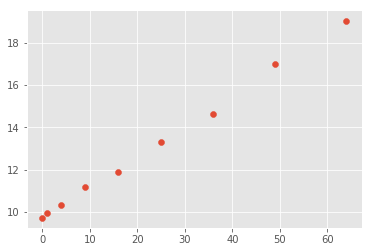

In [23]:
plt.scatter(y=T*T, x=h*h)
plt.show()

In [24]:
print(T*T)
print(DT*2*T)
print((DT*2*T)/(T*T))
print(h*h)

[ 19.04100496  16.97275204  14.65205284  13.31374144  11.909401
  11.16361744  10.31565924   9.94267024   9.73814436]
[ 0.03431053  0.03058369  0.02640195  0.02399041  0.02145989  0.02011604
  0.01858808  0.01791598  0.01754744]
[ 0.00180193  0.00180193  0.00180193  0.00180193  0.00180193  0.00180193
  0.00180193  0.00180193  0.00180193]
[ 64.  49.  36.  25.  16.   9.   4.   1.   0.]


Координаты для построения

In [25]:
scale = 3.
print(T*T / scale)
print(DT*2*T / scale)
print(h*h / scale)
print(dh2 / scale)

[ 6.34700165  5.65758401  4.88401761  4.43791381  3.96980033  3.72120581
  3.43855308  3.31422341  3.24604812]
[ 0.01143684  0.01019456  0.00880065  0.0079968   0.0071533   0.00670535
  0.00619603  0.00597199  0.00584915]
[ 21.33333333  16.33333333  12.           8.33333333   5.33333333   3.
   1.33333333   0.33333333   0.        ]
[ 0.53333333  0.46666667  0.4         0.33333333  0.26666667  0.2
  0.13333333  0.06666667  0.        ]


К графику (T^2 от H^2)

In [26]:
ms1 = 709.8 * 1e-3
ms2 = 707.4 * 1e-3
ms = m + ms1 + ms2

Dms1 = Dms2 = 0.1 * 1e-3
Dms = sqrt(Dms1 ** 2 + Dms2 **2 + Dm**2)
Ems = Dms / ms

ms12 = ms1 + ms2
Dms12 = sqrt(Dms1 ** 2 + Dms2 **2)
Ems12 = Dms12 / ms12

bPlot = ms12 / (k * ms);
EbPlot= sqrt(Ems12**2 + Ems **2 + Ek**2)

sciPrint(bPlot, EbPlot)

0.14431182727040767 +- 0.0017319138367660337 ( 1.2001191236535447 %)


In [27]:
Rpuck = 9.1 / 2.
DRpuck = 0.01
ERpuck = DRpuck/ Rpuck
Ipuck = 1./2.*ms12 * (Rpuck**2)
EIpuck = sqrt(Ems12**2 + (2*ERpuck)**2)

aI = Ipuck + ITheory1
EaI = (Ipuck* EIpuck + ITheory1*EiTheory1) / aI
sciPrint(aI, EaI)

a = aI / (ms * k)
Ea = sqrt(EaI**2 +  Ems **2 + Ek**2)
sciPrint(a, Ea)


93.771354 +- 1.330341209780234 ( 1.4187074762514722 %)
9.548627886932156 +- 0.17743286020217897 ( 1.8582026894671013 %)


In [34]:
bExpMin = 2.9/21.5
bExpMin

0.13488372093023254

In [35]:
bExpMax = 3.5/21.5
bExpMax

0.16279069767441862

In [36]:
DbExp = (bExpMax - bExpMin) / sqrt(9)
bExp = 3.2/21.5
sciPrint(bExp, DbExp/(bExp))

0.14883720930232558 +- 0.009302325581395357 ( 6.250000000000005 %)


In [62]:
a = 9.3
Da = 0.6/3.
sciPrint(a, Da/a)

9.3 +- 0.2 ( 2.150537634408602 %)
